Author: Artem Golotin    
CS501R - Playground Lab 1

#### Part 1

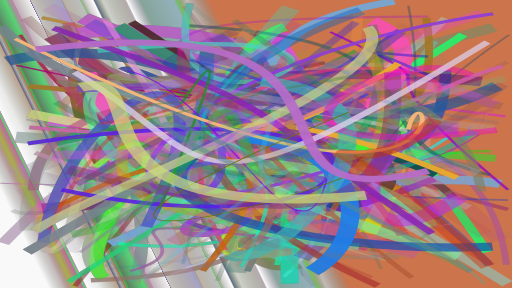

In [1]:
from pdb import set_trace as debugger
import cairo, numpy, math

WIDTH = 512 
HEIGHT = 288
        
# A simple function to display an image in an ipython notebook 
def nbimage( data ):
    from IPython.display import display, Image 
    from PIL.Image import fromarray
    from StringIO import StringIO
    s = StringIO()
    fromarray( data ).save( s, 'png' ) 
    display( Image( s.getvalue() ) )
   

def draw_gradient(cr):
    grd = numpy.random.rand(4)
    pat = cairo.LinearGradient(grd[0], grd[1], grd[2], grd[3])
    i = 0.05
    while i < 0.95:
        x = numpy.random.rand(5)
        pat.add_color_stop_rgba(x[0], x[1], x[2], x[3], x[4])
        i = i + 0.025
    cr.rectangle(0, 0, 1, 1) # Rectangle(x0, y0, x1, y1)
    cr.set_source(pat)
    cr.fill()
    
def draw_curve(cr):
    r_coord = numpy.random.rand(6) 
    cr.curve_to(r_coord[5], r_coord[4], r_coord[3], r_coord[2], r_coord[1], r_coord[0]) # Curve(x1, y1, x2, y2, x3, y3)

def draw_line(cr):
    r_coord = numpy.random.rand(2)
    cr.line_to(r_coord[0], r_coord[1]) # Line to (x,y)

def stroke(cr):
    rgba = numpy.random.rand(4)
    cr.set_source_rgba(rgba[3], rgba[2], rgba[1], rgba[0]) 
    cr.set_line_width(numpy.random.randint(WIDTH + HEIGHT) / 20000.0)
    cr.stroke()

# this is a numpy buffer to hold the image data
data = numpy.zeros((HEIGHT,WIDTH,4), dtype=numpy.uint8)
# this creates a cairo context based on the numpy buffer
ims = cairo.ImageSurface.create_for_data( data, cairo.FORMAT_ARGB32, WIDTH, HEIGHT ) 
cr = cairo.Context(ims)

# Normalize canvas
cr.scale(WIDTH, HEIGHT)
# Background
draw_gradient(cr)
# Rest of the shapes
for _ in xrange(250):
    trnslt = numpy.random.rand(2)
    cr.move_to(trnslt[0], trnslt[1])
    # Draw a line or a curve
    draw_curve(cr) if numpy.random.randint(1) % 2 == 0 else draw_line(cr)
    # Set random colors and paint
    stroke(cr)

# display the image 
nbimage(data)

#### Part 2

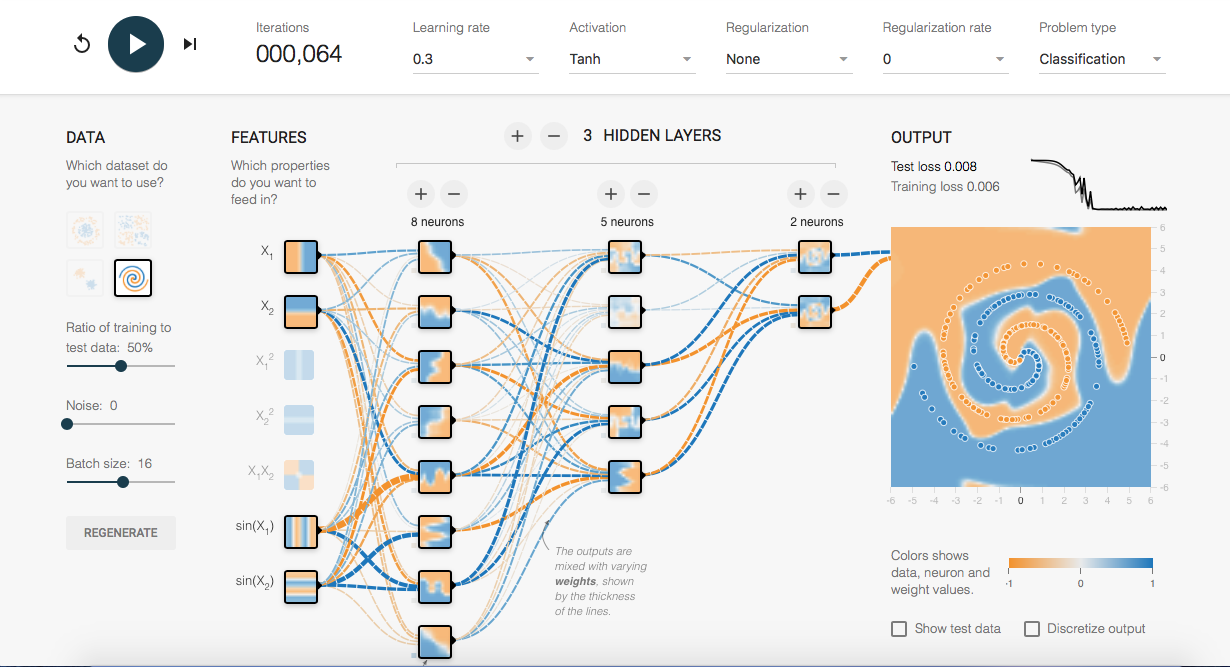

In [1]:
from IPython.display import Image
Image(filename='tensorflow_playgroung.png')